In [13]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [14]:
connect=sqlite3.connect('../data/checking-logs.sqlite', check_same_thread=False)

In [15]:
df=pd.io.sql.read_sql('select * from checker where uid like "user_%" ', connect, parse_dates=['timestamp'])
df

,index,status,success,timestamp,numTrials,labname,uid
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4
...,...,...,...,...,...,...,...
3202,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1
3203,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1
3204,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1
3205,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1


In [16]:
labels=['night','morning', 'afternoon','evening']
bins=[-1, 4, 10, 17, 24]
df['date']=df['timestamp'].dt.date
df['hour']=df['timestamp'].dt.hour
df['weekday']=df['timestamp'].dt.day_of_week
df['day_status']=df['weekday'].apply(lambda x: 'working' if x<5 else 'weekend')
df['day']=df['timestamp'].dt.day
df['day period']=pd.cut(df['hour'], bins=bins, labels=labels)
df

,index,status,success,timestamp,numTrials,labname,uid,date,hour,weekday,day_status,day,day period
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4,2020-04-17,5,4,working,17,morning
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4,2020-04-17,5,4,working,17,morning
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4,2020-04-17,5,4,working,17,morning
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4,2020-04-17,5,4,working,17,morning
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4,2020-04-17,5,4,working,17,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3202,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1,2020-05-21,20,3,working,21,evening
3203,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1,2020-05-21,20,3,working,21,evening
3204,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1,2020-05-21,20,3,working,21,evening
3205,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1,2020-05-21,20,3,working,21,evening


In [17]:
working=df[df['day_status']=='working'][['hour']]
working


,hour
0,5
1,5
2,5
3,5
4,5
...,...
3202,20
3203,20
3204,20
3205,20


In [18]:
weekend=df[df['day_status']=='weekend'][['hour']]
weekend

,hour
23,7
24,13
25,13
26,13
27,13
...,...
3088,22
3089,22
3090,22
3091,22


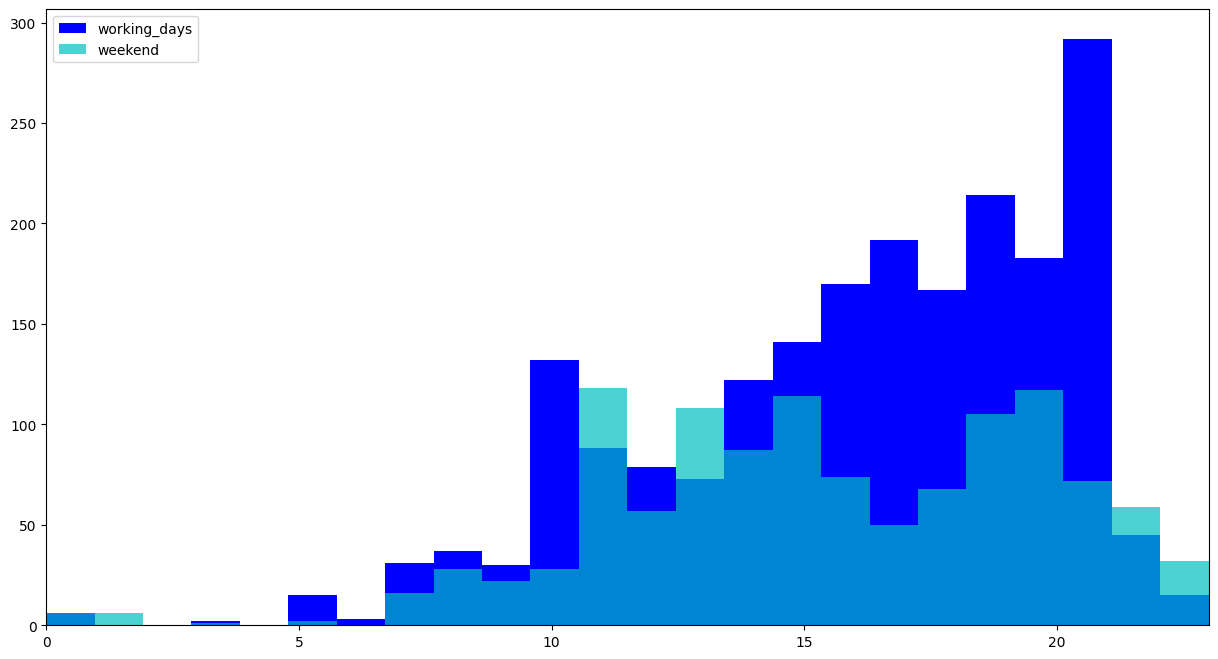

In [19]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(working['hour'],bins=24,label='working_days',color='b')
ax.hist(weekend['hour'],bins=24, label='weekend',color='c', alpha=0.7)
ax.set_xlim(0, 23)
ax.legend(loc='upper left', fontsize='10')
plt.show()